## COVID-19 Project Midterm Report Supplementary Material
### The Contaminated U.S. Labour Market by COVID-19: Unemployment Spikes and SpreadingSpeed of the Novel Coronavirus

### Preliminary model design using Difference-in-Differences Approach with fixed effects and state-specific time trend:
$$
Y_{s,t}=\alpha+\delta_{DD}COVID19_{s,t}+\sum_{i=Alaska}^{Wyoming}\beta_iSTATE_{i,s}+\sum_{j=Alaska}^{Wyoming}\gamma_jWEEK_{j,t} $$ $$+\sum_{i=Alaska}^{Woyming}\theta_i(STATE_{i,s}\times t)+\kappa 
_isector_k+e_{s,t}
$$

### Target Variable and Features
**Target Variable**:
$Y_{s,t}$: number of unemployment claims in state $s$, week $t$

<p><b>Features</b>:</p>
$COVID19_{s,t}$: dummy variable, equals 1 if the number of new reported cases in state $s$ during week $t$ is larger than the increased new cases in the previous week 
<br>$STATE_i$: dummy variable, equals 1 if the observation is in state $i$ (from $Alaska$ to $Wyoming$), reference group = $Alabama$</br>
<br>$WEEK_j$: dummy variable, equals 1 if the observation is in week $j$ since the first case diagnosed in the U.S.</br>
<br>$STATE_{i,s}\times t$: state-specific time trend, $t$ = week since the COVID-19 outbreak</br>
<br>$sector_k$: dummy variable, equals 1 if the observation is from sector $k$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load processed data and store in dataframe df

In [2]:
path = 'data/data.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', 148)
df.head(5)

,"Y_(s,t)","COVID_(s,t)",Alabama,Alaska,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,North Carolina,North Dakota,Nebraska,New Hampshire,New Jersey,New Mexico,Nevada,New York,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,WEEK1,WEEK2,WEEK3,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10,WEEK11,WEEK12,WEEK13,WEEK14,WEEK15,WEEK16,WEEK17,WEEK18,WEEK19,Alabama x t,Alaska x t,Arkansas x t,Arizona x t,California x t,Colorado x t,Connecticut x t,Delaware x t,District of Columbia x t,Florida x t,Georgia x t,Hawaii x t,Idaho x t,Illinois x t,Indiana x t,Iowa x t,Kansas x t,Kentucky x t,Louisiana x t,Maine x t,Maryland x t,Massachusetts x t,Michigan x t,Minnesota x t,Mississippi x t,Missouri x t,Montana x t,North Carolina x t,North Dakota x t,Nebraska x t,New Hampshire x t,New Jersey x t,New Mexico x t,Nevada x t,New York x t,Ohio x t,Oklahoma x t,Oregon x t,Pennsylvania x t,Puerto Rico x t,Rhode Island x t,South Carolina x t,South Dakota x t,Tennessee x t,Texas x t,Utah x t,Vermont x t,Virgin Islands x t,Virginia x t,Washington x t,West Virginia x t,Wisconsin x t,Wyoming x t,Agriculture/Forestry/Fishing and Hunting,Mining,Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transporation and Warehousing,Information,Finance and Insurance,"Real Estate, Rental and Leasing",Professional/Scientific/Technical Services,Management of Companies and Enterprises,Administration and Support/Waste Management and Remedial Services,Educational Services,Healthcare and Social Assistance,"Arts, Entertainment and Recreation",Accomodation and Food Services,Other Services (except Public Administration),Public Administration,Information Not Available
0,2129,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2170,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1735,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Exploratory Data Analysis

In [4]:
#Check the number of rows and columns
df.shape

(1007, 148)

In [5]:
#make sure that dataframe is in numeric form
df.dtypes

Y_(s,t)                                                              int64
COVID_(s,t)                                                          int64
Alabama                                                              int64
Alaska                                                               int64
Arkansas                                                             int64
Arizona                                                              int64
California                                                           int64
Colorado                                                             int64
Connecticut                                                          int64
Delaware                                                             int64
District of Columbia                                                 int64
Florida                                                              int64
Georgia                                                              int64
Hawaii                   

In [6]:
#summary statistics of COVID_19(s,t)
df['COVID_(s,t)'].describe()

count    1007.000000
mean        0.450844
std         0.497825
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: COVID_(s,t), dtype: float64

In [7]:
#summary statistics of dependent variable Y_(s,t)
df['Y_(s,t)'].describe()

count    1.007000e+03
mean     4.032762e+04
std      8.172370e+04
min      6.000000e+00
25%      2.370500e+03
50%      9.325000e+03
75%      4.256300e+04
max      1.058325e+06
Name: Y_(s,t), dtype: float64

In [8]:
#get the column names for sector
df.keys()[-21:]

Index(['Agriculture/Forestry/Fishing and Hunting', 'Mining', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transporation and Warehousing', 'Information', 'Finance and Insurance',
       'Real Estate, Rental and Leasing',
       'Professional/Scientific/Technical Services',
       'Management of Companies and Enterprises',
       'Administration and Support/Waste Management and Remedial Services',
       'Educational Services', 'Healthcare and Social Assistance',
       'Arts, Entertainment and Recreation', 'Accomodation and Food Services',
       'Other Services (except Public Administration)',
       'Public Administration', 'Information Not Available'],
      dtype='object')

In [9]:
#check the correlation between target variable Y and sector features
for sector in df.keys()[-21:]:
    print(sector)
    print(df[['Y_(s,t)',sector]].corr())

Agriculture/Forestry/Fishing and Hunting
                                          Y_(s,t)  \
Y_(s,t)                                   1.00000   
Agriculture/Forestry/Fishing and Hunting  0.06272   

                                          Agriculture/Forestry/Fishing and Hunting  
Y_(s,t)                                                                    0.06272  
Agriculture/Forestry/Fishing and Hunting                                   1.00000  
Mining
         Y_(s,t)   Mining
Y_(s,t)  1.00000  0.06645
Mining   0.06645  1.00000
Utilities
            Y_(s,t)  Utilities
Y_(s,t)    1.000000   0.075361
Utilities  0.075361   1.000000
Construction
              Y_(s,t)  Construction
Y_(s,t)       1.00000       0.02085
Construction  0.02085       1.00000
Manufacturing
                Y_(s,t)  Manufacturing
Y_(s,t)        1.000000       0.075638
Manufacturing  0.075638       1.000000
Wholesale Trade
                  Y_(s,t)  Wholesale Trade
Y_(s,t)          1.000000         0.066889
Wh

## Linear Regression

In [10]:
df.keys()[1:]  #get the features name

Index(['COVID_(s,t)', 'Alabama', 'Alaska', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       ...
       'Professional/Scientific/Technical Services',
       'Management of Companies and Enterprises',
       'Administration and Support/Waste Management and Remedial Services',
       'Educational Services', 'Healthcare and Social Assistance',
       'Arts, Entertainment and Recreation', 'Accomodation and Food Services',
       'Other Services (except Public Administration)',
       'Public Administration', 'Information Not Available'],
      dtype='object', length=147)

In [11]:
#Fit the linear regression
lm = LinearRegression()
X = df[df.keys()[1:]]
Y = df['Y_(s,t)']
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model goodness of fit Quantification & Visualization

In [12]:
Yhat = lm.predict(X)
print('The model fit is: ', lm.score(X,Y))   # R_squared

The model fit is:  0.6616204838775057


In [13]:
mse = mean_squared_error(Y, Yhat)
print('The mean square error of weekly initial claims and predicted value is: ', mse)   #Mean-Squared-Error

The mean square error of weekly initial claims and predicted value is:  2257712203.423039


### Compare the distribution of actual weekly initial UI claims, $Y_{(s,t)}$, with the predicted $Y$ value distribution

/Users/angela/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/angela/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


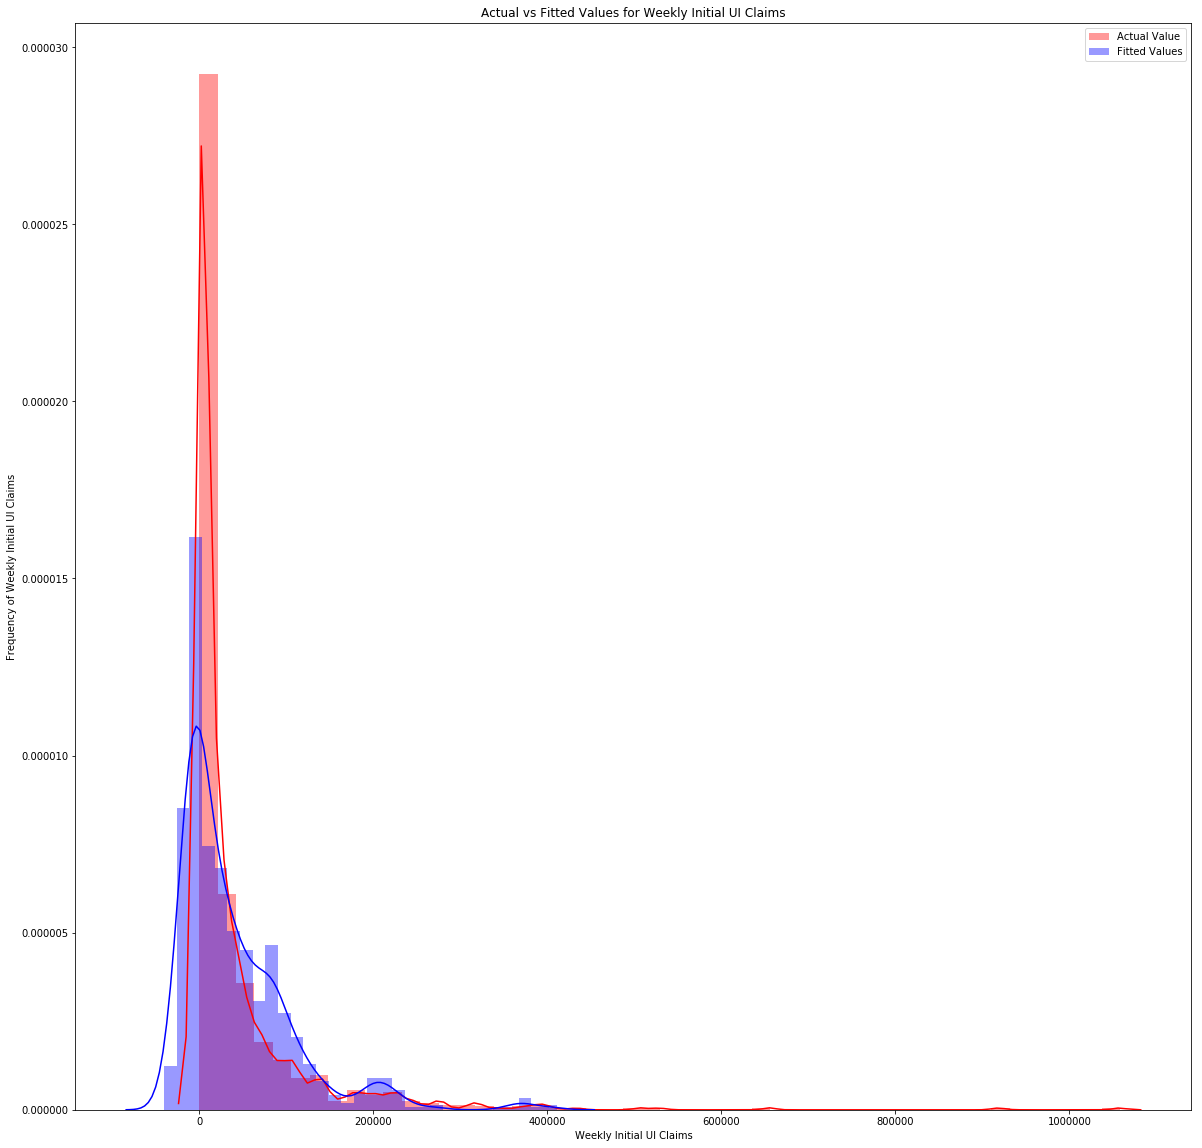

In [20]:
import seaborn as sns
%matplotlib inline

width = 20
height = 20
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Y_(s,t)'], hist=True, color="r", label="Actual Value")
sns.distplot(Yhat, hist=True, color="b", label="Fitted Values" , ax=ax1)
# ax=ax1 so that two graphs overlay

plt.title('Actual vs Fitted Values for Weekly Initial UI Claims')
plt.xlabel('Weekly Initial UI Claims')
plt.ylabel('Frequency of Weekly Initial UI Claims')

plt.legend()
plt.show()
plt.close()

An underestimation for $Y_{(s,t)}$ around 0 cases can be observed under the linear regression.

## Multi-Layer Perceptron (MLP)

In [15]:
# Obtain independent and dependent variables
X = df[df.keys()[1:]]
Y = df['Y_(s,t)']
print(X.shape, Y.shape)

(1007, 147) (1007,)


In [16]:
# Train the regression model with two hidden layers
regr = MLPRegressor(random_state=1, hidden_layer_sizes=(100,50,), \
                    max_iter=10000).fit(X.values, Y.values.ravel())
regr.score(X, Y)
Y_pred = regr.predict(X)

### Model goodness of fit Quantification & Visualization

In [17]:
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

Mean squared error: 2200183921.96
Coefficient of determination: 0.67


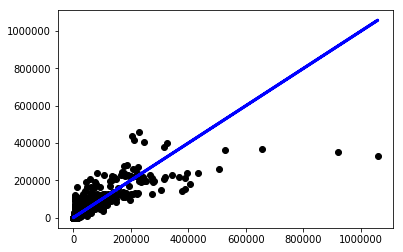

In [18]:
# Plot outputs
# Linear line represents ideal output
# Scattered dots represent the predicted Y values
plt.scatter(Y, Y_pred,  color='black')
plt.plot(Y, Y, color='blue', linewidth=3)

### Compare the distribution of actual weekly initial UI claims, $Y_{(s,t)}$, with the predicted $Y$ value distribution

/Users/angela/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/angela/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


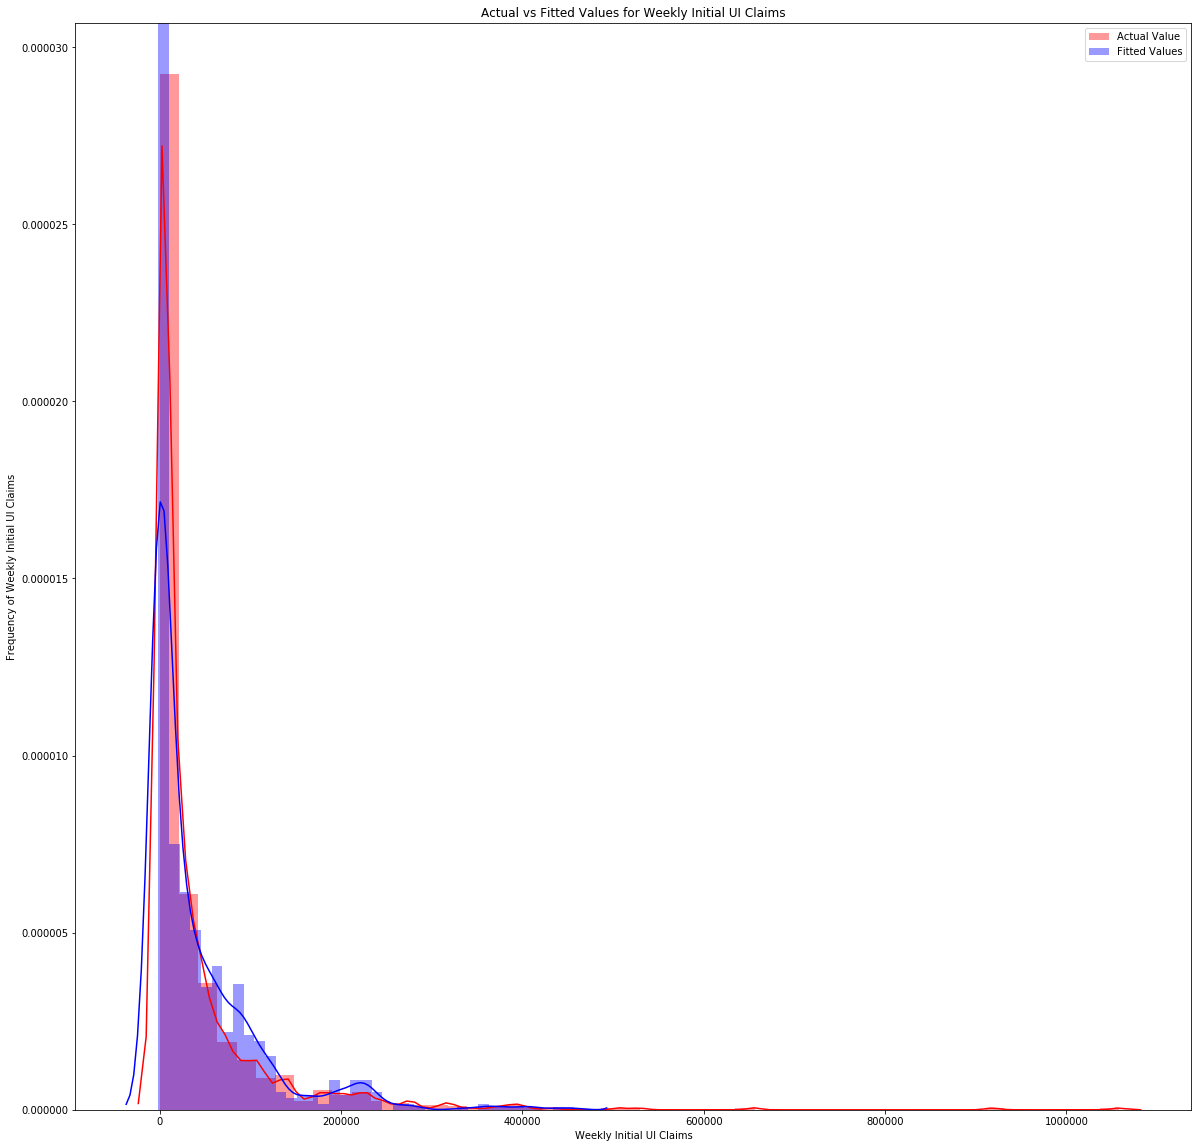

In [21]:
%matplotlib inline

width = 20
height = 20
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Y_(s,t)'], hist=True, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=True, color="b", label="Fitted Values" , ax=ax1)    
# ax=ax1 so that two graphs overlay

plt.title('Actual vs Fitted Values for Weekly Initial UI Claims')
plt.xlabel('Weekly Initial UI Claims')
plt.ylabel('Frequency of Weekly Initial UI Claims')

plt.legend()
plt.show()
plt.close()

Although the coefficient of determination for the linear regression and the MLP case are similar, we can see that the predicted values fit nicer around 0 cases. However, there is still an underestimation for $Y_{(s,t)}$ at around 0.